#Aperture Photometry

EFY, SWRI, 4-JUN-2015

BASIC IDEA:
The goal of aperture photometry is to estimate a star's brightness in your image. It works this way:

- Estimate the position of the star center (the "centroid").
- Add up all of the signal within a certain radius of the star center. This is your "aperture."
- Estimate the background level in a ring around the aperture. Subtract the background level to get the source counts.

##STEP 0: Let's make some fake data

In [7]:
%pylab 

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [8]:
#Always start with %pylab to get numpy and matplotlib into our namespace

In [9]:
xc = 65.2 # We'll put a fake star at (xc, yc)

In [10]:
yc = 122.7

In [11]:
npts = 256 #Size of our arrays

In [12]:
yVal, xVal = indices((256,256)) #Make two arrays containing y and x index values

Equation for a gaussian (in radius):

$G(r) = A e^{-(r - r_c)/(2\sigma^2)}$

Relation between $\sigma$ and FWHM (full-width and half-maximum):

${FWHM}= 2\sqrt{2\ln{2}}\sigma = 2.3548\sigma$

In [13]:
FWHM = 10.0 #Width of our "star"

In [14]:
sigma = FWHM/2.3548

In [15]:
A = 100. # Amplitude of the star at its center

In [16]:
r = sqrt((yVal - yc)**2 + (xVal - xc)**2) # an array of distances from the star center

In [17]:
g = A * exp(-(r)**2/(2*sigma**2)) # Create a 10-pixel wide gaussian centered at xc,yc

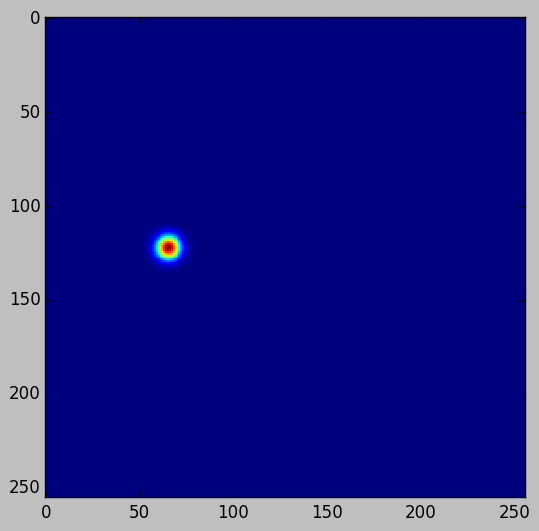

In [21]:
imshow(g, interpolation="nearest")
figure(1)

In [23]:
sum(g) #Brightness of the star is the sum of all pixels

11331.093262003855

###Now let's add some noise

In [24]:
bias = 400.0

In [25]:
sky_nz = 10.0

In [26]:
nz = random.normal(bias, sky_nz, (npts,npts)) # Makes an array of normally distributed random noise

###Call chzphot_v02 for robomad, then estimate the mean and sdev of the noise

In [32]:
run /Users/charliewatson/gdrive/swri/pterocode/chzphot_v02.py

In [34]:
thresh = 5.0 # reject outliers at the 5-sigma level

In [35]:
mn, sd = robomad(nz, thresh)

In [36]:
mn, sd # should be 400, 10

(400.02323923611448, 9.9614821016738428)

In [37]:
d = g + nz # Make some fake noisy data

In [38]:
figure(2)

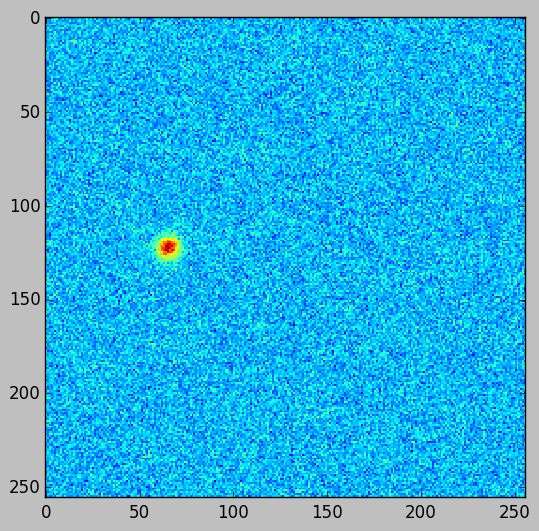

In [41]:
imshow(d, interpolation="nearest")
figure(2)

In [42]:
xg=65
yg=123
radius=10
gcntrd(g,radius,xg,yg)

(65.200000000000003, 122.7)

In [43]:
xg=65
yg=123
radius=8.5
gcntrd(g,radius,xg,yg)

(65.700000000000003, 123.2)

In [49]:
bpix=where(d>(mn+3*sd))

In [50]:
m1=ones((npts,npts))
z1=zeros((npts,npts))

In [51]:
z1[bpix]=1

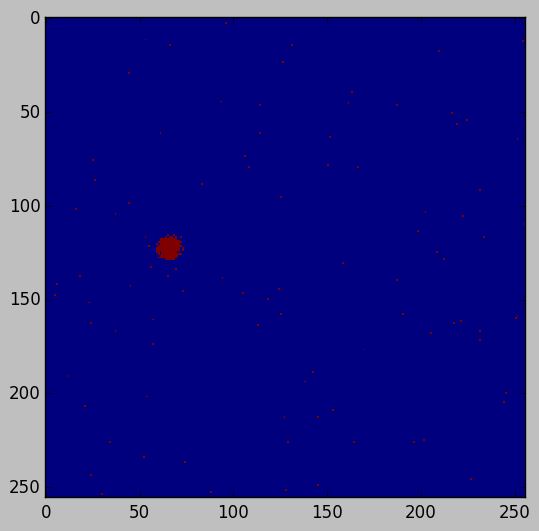

In [53]:
figure(3)
imshow(z1, interpolation='nearest')
figure(3)

In [54]:
sum(z1)

234.0

In [55]:
d.max()

509.3044281410439

In [56]:
sqrt(73)

8.5440037453175304

In [57]:
subd=d[113:133,55:75] #+/- 10 away from the center, make subgraph
subd.shape

(20, 20)

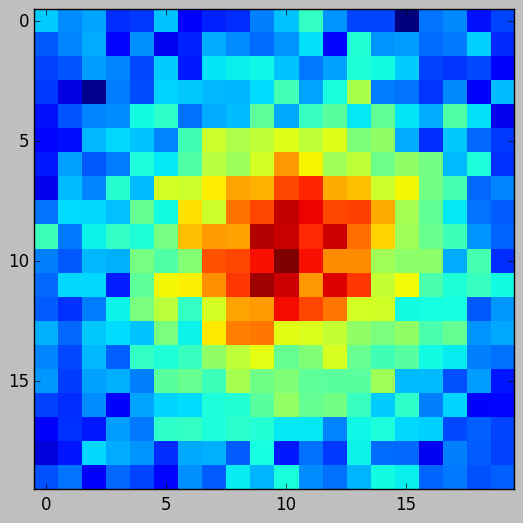

In [62]:
clf()
imshow(subd, interpolation='nearest')
figure(3)

In [63]:
bigD=rebin1(subd,200,200)

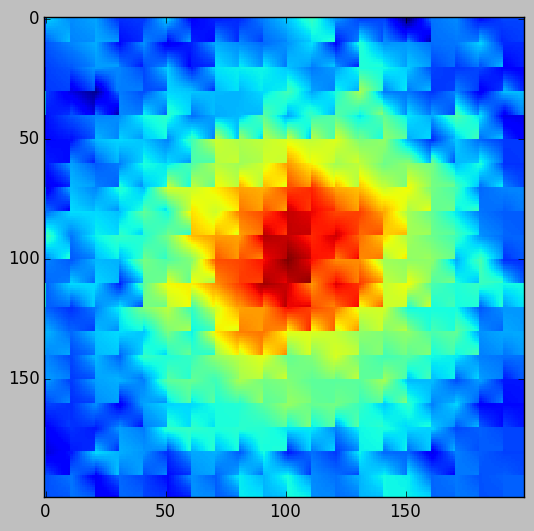

In [65]:
clf()
imshow(bigD, interpolation='nearest')
figure(3)

In [66]:
#really cheezy exp
sum(d[bpix])-sum(z1*mn)

11149.757353897236